In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import statistics
import datetime

#csv file path
spotify_csv = "C:/Users/jmced/Desktop/Music/spotify_data.csv"

# Read the music csv
spotify_data= pd.read_csv(spotify_csv)

spotify_data.head()



,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [2]:
# Narrow down cities that fit criteria and drop any results with null values
clean_df = spotify_data.loc[(spotify_data["popularity"] > 20) & (spotify_data["year"] > 2010) ]                    
                                       
 # Drop any rows with null value
clean_df.dropna()
#seconds = int("duration_ms")/ 1000
clean_df.head()


,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [21]:

Mean_df = clean_df.groupby(["genre"]).mean('popularity')
Mean_df = Mean_df.rename(columns={"popularity": "Mean Popularity"})
popularity_mean = Mean_df.nlargest(10,'Mean Popularity')
pop_mean2 =(popularity_mean.loc[:, popularity_mean.columns ==  'Mean Popularity'])
pop_mean2






,Mean Popularity
genre,
pop,62.220615
hip-hop,52.024570
dance,50.231911
rock,49.845267
indie-pop,46.621681
electro,43.827305
house,42.792418
sad,42.790418
alt-rock,41.012799


In [40]:
# Define a function to create Linear Regression plots


def linear_regress(x_val, y_val, c):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))       
    
    plt.plot(x_val, regress_values, "r-")
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regress_values,"r-")
    plt.annotate(line_eq, c, fontsize=15,color="red")
    plt.xlabel(f"{x_val.name}")
    plt.ylabel(f"{y_val.name}")
    plt.minorticks_on()
    print(f"The correlation coefficient between x and y is {round(st.pearsonr(x_val,y_val)[0],2)}")

    
    
    
    


The correlation coefficient between x and y is 0.19


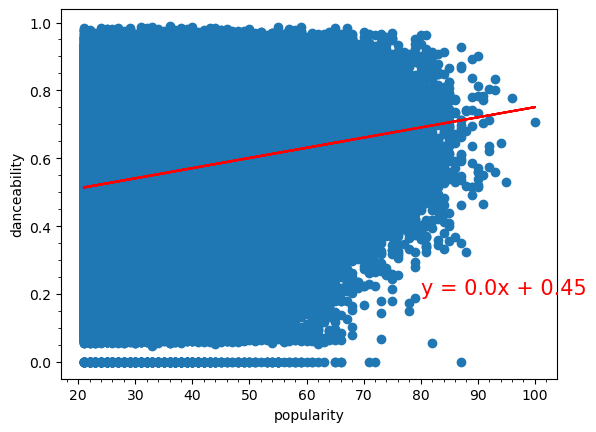

In [45]:
# Linear regression on populatity vs danceability
linear_regress(clean_df["popularity"], clean_df["danceability"], (80, 0.2))




The correlation coefficient between x and y is -0.15


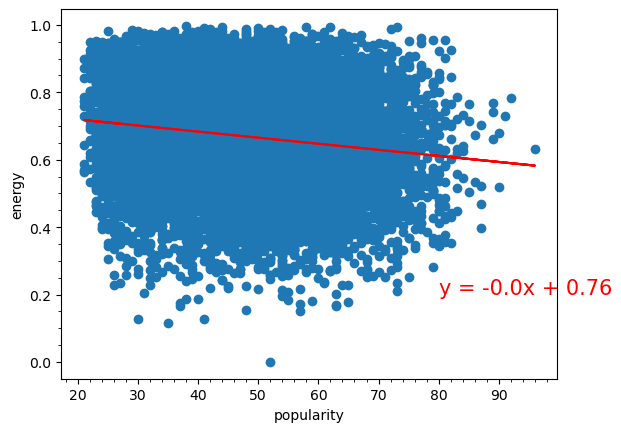

In [8]:
# Linear regression on populatity vs energy
linear_regress(clean_df["popularity"], clean_df["energy"], (80, 0.2))

The correlation coefficient between x and y is -0.11


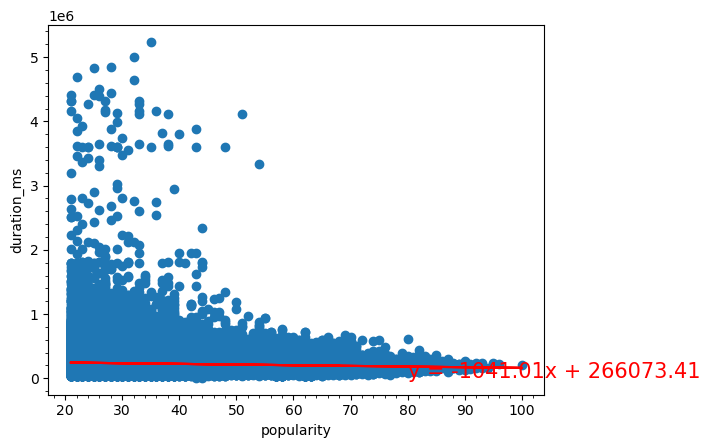

In [122]:
#Linear regression on populatity vs Duration
linear_regress(clean_df["popularity"], clean_df["duration_ms"], (80, 0.2))

The correlation coefficient between x and y is -0.07


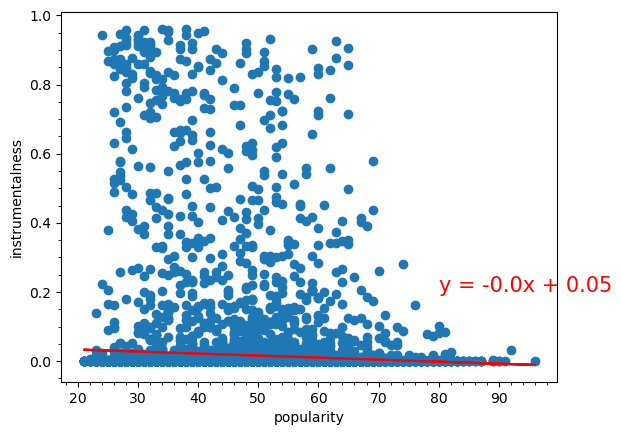

In [9]:
#Linear regression on populatity vs Instrumentalness
linear_regress(clean_df["popularity"], clean_df["instrumentalness"], (80, 0.2))